Chapter 8 신경망.딥러닝의 응용

8.1 MNIST 데이터베이스

In [3]:
# 리스트 8-1(1)

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test,) = mnist.load_data()

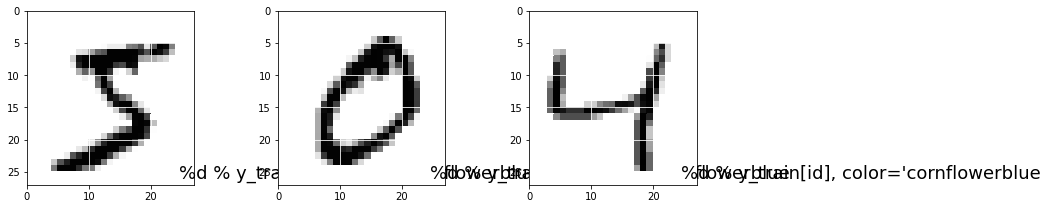

In [5]:
# 리스트 8-1-(2)
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(3):
  plt.subplot(1,3, id+1)
  img = x_train[id, :, :]
  plt.pcolor(255 - img)
  plt.text(24.5, 26, "%d % y_train[id], color='cornflowerblue", fontsize=18)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.grid('on', color='white')

plt.show()

8.2 2층 피드 포워드 네트워크 모델

In [6]:
# 리스트 8-1-(3)
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784) #(A)
x_train = x_train.astype('float32') #(B)
x_train = x_train / 255 #(C)

num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes) #(D)
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [9]:
# 리스트 8-1-(4)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential() # (A)
model.add( Dense(16, input_dim=784, activation='sigmoid') ) #(B)
model.add( Dense(10, activation='softmax') ) #(C)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) #(D)

In [43]:
# 리스트 8-1-(5)

import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test)) #(A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 0s 6ms/step - loss: 0.2367 - accuracy: 0.9362 - val_loss: 0.2523 - val_accuracy: 0.9295
Epoch 2/10
60/60 [==============================] - 0s 6ms/step - loss: 0.2342 - accuracy: 0.9367 - val_loss: 0.2508 - val_accuracy: 0.9296
Epoch 3/10
60/60 [==============================] - 0s 6ms/step - loss: 0.2316 - accuracy: 0.9376 - val_loss: 0.2484 - val_accuracy: 0.9303
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2291 - accuracy: 0.9383 - val_loss: 0.2465 - val_accuracy: 0.9311
Epoch 5/10
60/60 [==============================] - 0s 6ms/step - loss: 0.2268 - accuracy: 0.9390 - val_loss: 0.2460 - val_accuracy: 0.9312
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.2246 - accuracy: 0.9391 - val_loss: 0.2431 - val_accuracy: 0.9313
Epoch 7/10
60/60 [==============================] - 0s 6ms/step - loss: 0.2223 - accuracy: 0.9399 - val_loss: 0.2430 - val_accuracy: 0.9321
Epoch 8/10
60/60 [==

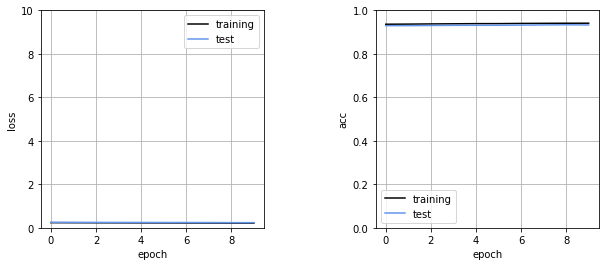

In [44]:
# 리스트 8-1-(6)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10,4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

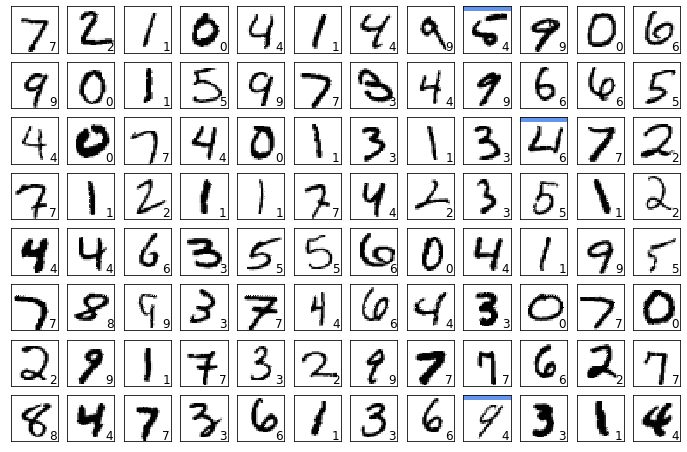

In [47]:
# 리스트 8-1-(7)

def show_prediction():
  n_show = 96
  y = model.predict(x_test)
  plt.figure(2, figsize=(12, 8))
  plt.gray()

  for i in range(n_show):
    plt.subplot(8, 12, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1 - x)
    wk = y[i, :]
    prediction = np.argmax(wk)
    plt.text(22, 25.5, "%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i, :]):
      plt.plot( [0,27], [1,1], color='cornflowerblue', linewidth=5 )
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
  
#메인 
show_prediction()
plt.show()

8.3 ReLU 활성화 함수

In [51]:
# 리스트 8-1-(8)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) #(A)
model.add(Dense(10, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 0s 7ms/step - loss: 1.5242 - accuracy: 0.5514 - val_loss: 0.8452 - val_accuracy: 0.8162
Epoch 2/10
60/60 [==============================] - 0s 6ms/step - loss: 0.6527 - accuracy: 0.8447 - val_loss: 0.4883 - val_accuracy: 0.8803
Epoch 3/10
60/60 [==============================] - 0s 6ms/step - loss: 0.4523 - accuracy: 0.8831 - val_loss: 0.3885 - val_accuracy: 0.8993
Epoch 4/10
60/60 [==============================] - 0s 6ms/step - loss: 0.3783 - accuracy: 0.8985 - val_loss: 0.3415 - val_accuracy: 0.9092
Epoch 5/10
60/60 [==============================] - 0s 6ms/step - loss: 0.3385 - accuracy: 0.9074 - val_loss: 0.3143 - val_accuracy: 0.9120
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.3135 - accuracy: 0.9128 - val_loss: 0.2981 - val_accuracy: 0.9149
Epoch 7/10
60/60 [==============================] - 0s 6ms/step - loss: 0.2960 - accuracy: 0.9172 - val_loss: 0.2854 - val_accuracy: 0.9179
Epoch 8/10
60/60 [==

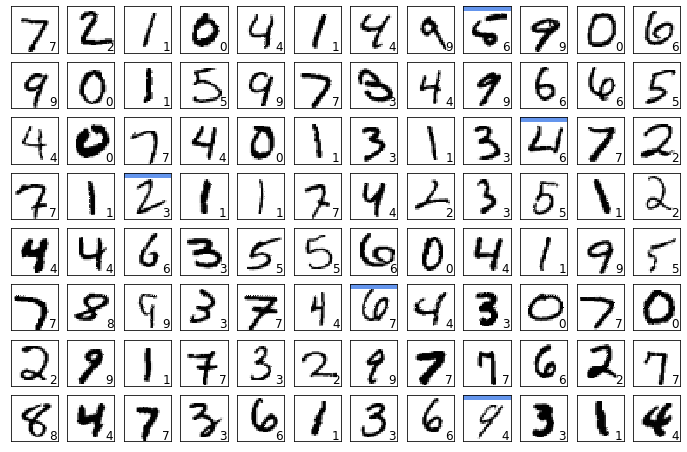

In [52]:
# 리스트 8-1-(9)
show_prediction()
plt.show()

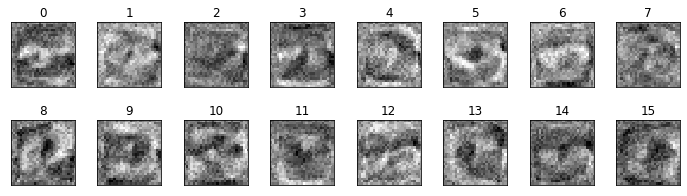

In [53]:
# 리스트 8-1-(10)
# 1층째의 가중치 시각화

w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)

for i in range(16):
  plt.subplot(2, 8, i + 1)
  w1 = w[:, i]
  w1 = w1.reshape(28, 28)
  plt.pcolor(-w1)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" % i)
plt.show()

8.4 공간필터

In [56]:
# 리스트 8-2-(1)
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

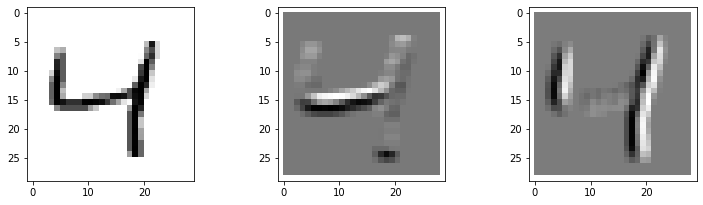

In [61]:
# 리스트 8-2-(2)
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1,1,1], [1,1,1], [-2,-2,-2]], dtype=float) #(A)
myfil2 = np.array([[-2,1,1], [-2,1,1], [-2,1,1]], dtype=float) #(B)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

#필터 처리
for ih in range(img_h - 3):
  for iw in range(img_w - 3):
    img_part = x_img[ih:ih + 3, iw:iw + 3]
    out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
    out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1))

# 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1,3,1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1,3,2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1,3,3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

8.5 합성곱 신경망

In [63]:
# 리스트 8-2-(3)

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3,3), padding='same', input_shape=(28,28,1), activation='relu')) #(A)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 12s 201ms/step - loss: 0.7235 - accuracy: 0.8146 - val_loss: 0.3331 - val_accuracy: 0.9039
Epoch 2/20
60/60 [==============================] - 12s 199ms/step - loss: 0.3108 - accuracy: 0.9106 - val_loss: 0.2684 - val_accuracy: 0.9239
Epoch 3/20
60/60 [==============================] - 12s 199ms/step - loss: 0.2568 - accuracy: 0.9276 - val_loss: 0.2295 - val_accuracy: 0.9358
Epoch 4/20
60/60 [==============================] - 12s 199ms/step - loss: 0.2198 - accuracy: 0.9380 - val_loss: 0.1970 - val_accuracy: 0.9438
Epoch 5/20
60/60 [==============================] - 12s 199ms/step - loss: 0.1895 - accuracy: 0.9468 - val_loss: 0.1760 - val_accuracy: 0.9507
Epoch 6/20
60/60 [==============================] - 12s 199ms/step - loss: 0.1661 - accuracy: 0.9538 - val_loss: 0.1543 - val_accuracy: 0.9599
Epoch 7/20
60/60 [==============================] - 12s 198ms/step - loss: 0.1477 - accuracy: 0.9598 - val_loss: 0.1397 - val_accuracy: 0.9622

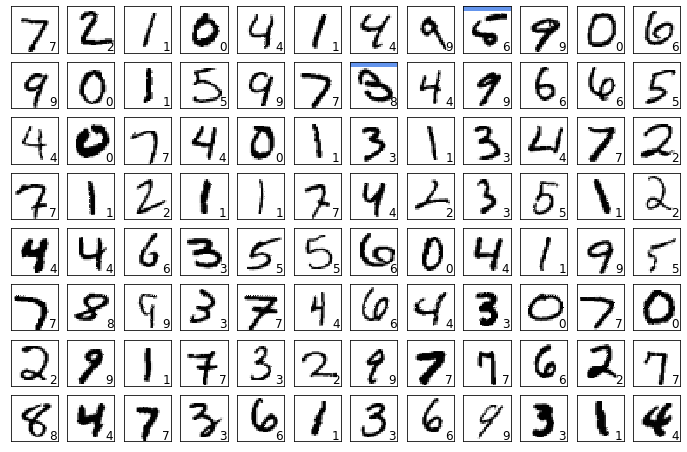

In [64]:
# 리스트 8-2-(4)
show_prediction()
plt.show()

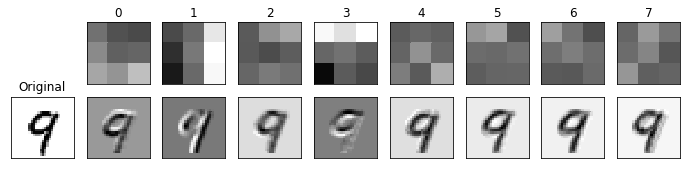

In [67]:
# 리스트 8-2-(5)
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2,9,10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28

x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0] #(A)
max_w = np.max(w)
min_w = np.min(w)

for i in range(8):
  plt.subplot(2, 9, i + 2)
  w1 = w[:, :, 0, i]
  w1 = w1.reshape(3,3)
  plt.pcolor(-w1, vmin=min_w, vmax=max_w)
  plt.xlim(0,3)
  plt.ylim(3,0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" % i)
  plt.subplot(2,9,i + 11)
  out_img = np.zeros_like(x_img)
  
  #필터 처리
  for ih in range(img_h - 3):
    for iw in range(img_w - 3):
      img_part = x_img[ih:ih + 3, iw:iw + 3]
      out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
  plt.pcolor(-out_img)
  plt.xlim(0, img_w)
  plt.ylim(img_h, 0)
  plt.xticks([], "")
  plt.yticks([], "")
plt.show()

8.8 MNIST 인식 네트워크 모델

In [68]:
# 리스트 8-2-(6)
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2))) #(A)
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2))) #(B)
model.add(Dropout(0.25)) #(C)

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) #(D)
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("test loss:", score[0])
print("test accu:", score[1])
print("computation time:{0:.3f} sec".format(time.time() - startTime))


Epoch 1/20
60/60 [==============================] - 67s 1s/step - loss: 0.6950 - accuracy: 0.7888 - val_loss: 0.1285 - val_accuracy: 0.9607
Epoch 2/20
60/60 [==============================] - 67s 1s/step - loss: 0.1349 - accuracy: 0.9596 - val_loss: 0.0619 - val_accuracy: 0.9802
Epoch 3/20
60/60 [==============================] - 67s 1s/step - loss: 0.0900 - accuracy: 0.9732 - val_loss: 0.0453 - val_accuracy: 0.9852
Epoch 4/20
60/60 [==============================] - 68s 1s/step - loss: 0.0695 - accuracy: 0.9788 - val_loss: 0.0382 - val_accuracy: 0.9877
Epoch 5/20
60/60 [==============================] - 67s 1s/step - loss: 0.0584 - accuracy: 0.9824 - val_loss: 0.0312 - val_accuracy: 0.9889
Epoch 6/20
60/60 [==============================] - 67s 1s/step - loss: 0.0489 - accuracy: 0.9848 - val_loss: 0.0296 - val_accuracy: 0.9906
Epoch 7/20
60/60 [==============================] - 67s 1s/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.0264 - val_accuracy: 0.9915
Epoch 8/20
60/60 [==

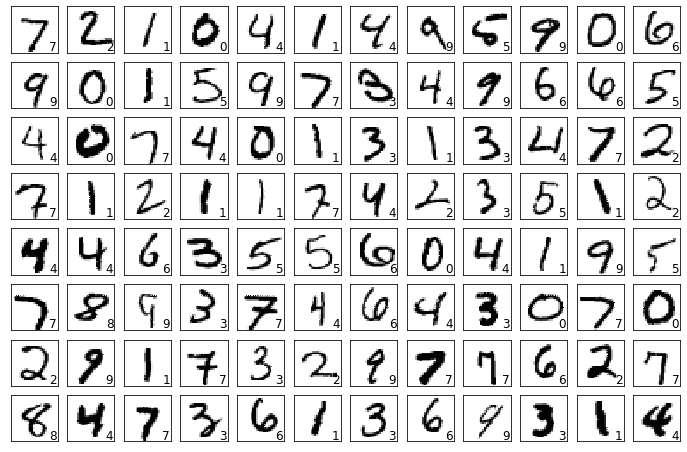

In [69]:
# 리스트 8-2-(7)

show_prediction()
plt.show()